<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/NB02_selectionBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Selection bias**: Occurs when the data sample is not representative of the target population. This can happen due to non-random sampling, over- or underrepresentation of certain groups, or self-selection bias. For example, a study on the health effects of alcohol that only recruits participants from bars and nightclubs will not represent the general population's alcohol consumption habits.

*The data used herein is for illustrative purposes only and does not reflect actual real-world data*

In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Census%20-%20USA.csv')
df.head()

,State,female,Race,Citizen,Income,Profession
0,Alabama,1,Black,False,44922.0,SelfEmployed
1,Alabama,1,White,True,51965.0,PublicWork
2,Alabama,1,Hispanic,False,63092.0,PrivateWork
3,Alabama,1,Black,True,34821.0,PrivateWork
4,Alabama,1,Asian,False,31390.0,SelfEmployed


#### Is it correct that the majority of Americans are either Hispanic or Asian?

Race
Asian       16986
Black        5694
Hispanic    21481
Native       3734
Pacific      2269
White       22737
Name: Income, dtype: int64


<Axes: xlabel='Race'>

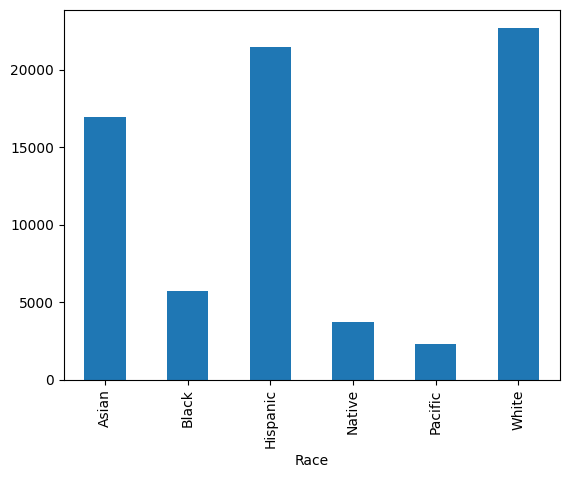

In [9]:
agg = df.groupby('Race').count()['Income']
print(agg)
agg.plot(kind='bar')

#### Is this data sample a realistic representation of the population that we are trying to analyze?

Citizen
False    38355
True     34546
Name: Income, dtype: int64


<Axes: ylabel='Income'>

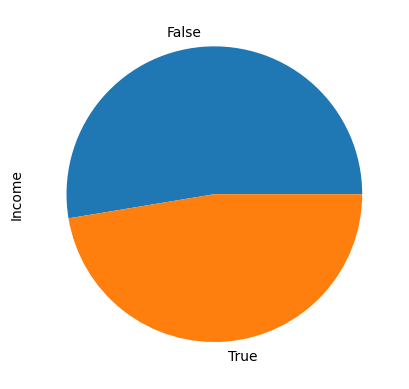

In [10]:
agg = df.groupby('Citizen').count()['Income']
print(agg)
agg.plot(kind='pie')

Race
Asian        3976
Black        2623
Hispanic     7845
Native       2093
Pacific      1752
White       16257
Name: Income, dtype: int64


<Axes: xlabel='Race'>

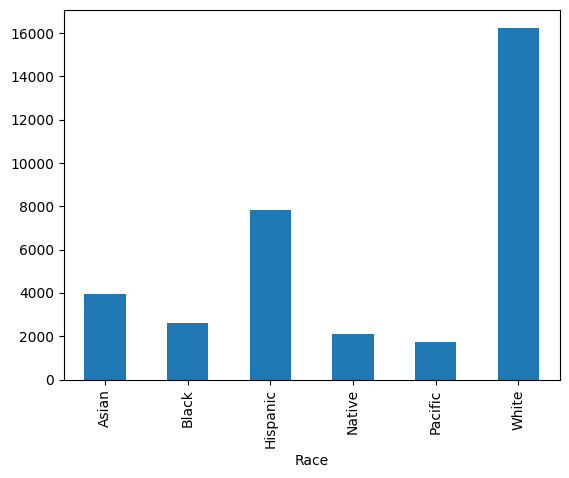

In [11]:
dfcitz = df[ df['Citizen']==True ]
agg = dfcitz.groupby('Race').count()['Income']
print(agg)
agg.plot(kind='bar')


#### Back to the Citizen vs Non-citizen, the Alien resident leans more on the welfare programs and doesn't work.

     Profession  Citizen        Income
0    FamilyWork    False  56314.785363
1    FamilyWork     True  62622.451372
2   PrivateWork    False  55243.261196
3   PrivateWork     True  63522.414423
4    PublicWork    False  56034.075691
5    PublicWork     True  69230.690988
6  SelfEmployed    False  59345.141542
7  SelfEmployed     True  68681.391285
8  Unemployment    False  30481.902066
9  Unemployment     True  31264.036172


<Axes: xlabel='Profession', ylabel='Income'>

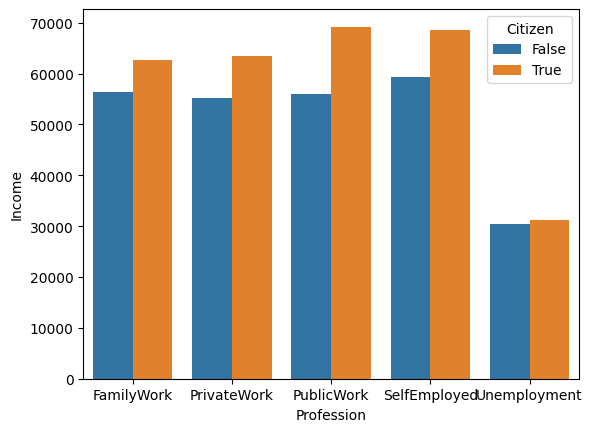

In [12]:
import seaborn as sns
agg = df.groupby(['Profession','Citizen'])['Income'].mean()
agg = agg.reset_index()
print(agg)
sns.barplot(x=agg['Profession'], y=agg['Income'], hue=agg['Citizen'])


####  Even when an alien resident works, they do it for lower salaries.

<Axes: xlabel='Profession', ylabel='Income'>

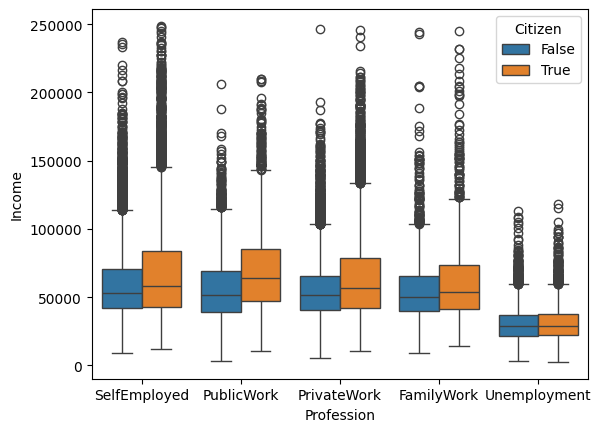

In [13]:
sns.boxplot(y=df['Income'], x=df['Profession'],hue=df['Citizen'])


#### Changing subject... Government/Public works earn more than other sectors, including the Private market.

<Axes: xlabel='Profession', ylabel='Income'>

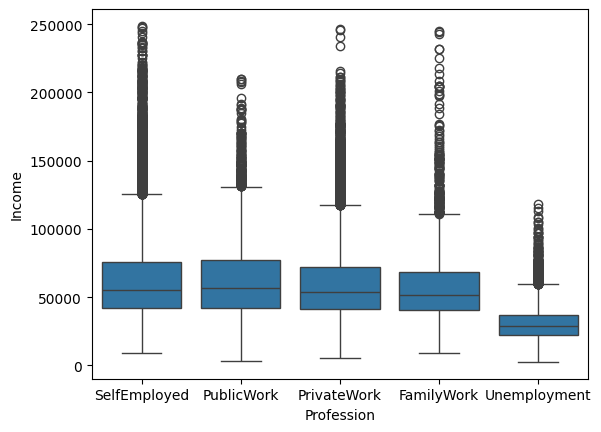

In [14]:
sns.boxplot(y=df['Income'], x=df['Profession'])


#### Maybe this is true for particular places? How about Virginia/DC ...

<Axes: xlabel='Profession', ylabel='Income'>

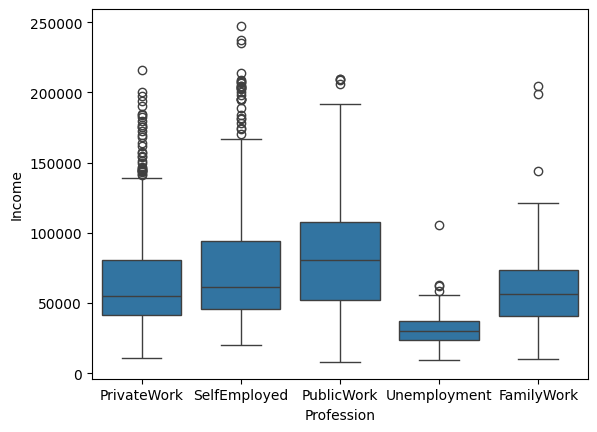

In [15]:
va = df[ df['State'] == 'Virginia' ]
sns.boxplot(y=va['Income'], x=va['Profession'])


In [16]:
vagov = va[ va['Profession']=='PublicWork']
vagov['Income'].describe()

,Income
count,662.000000
mean,84249.048338
std,37659.817633
min,8043.000000
25%,52062.750000
50%,80625.000000
75%,107949.000000
max,209698.000000


#### One last topic, similarly to the simple bar plot comparing Profession (categorical) and Citzenship (binary). In case we had two categorical variables, how could we compare those?

Race             Asian     Black  Hispanic    Native   Pacific     White
Profession                                                              
FamilyWork    0.306878  0.049735  0.294885  0.070194  0.022928  0.255379
PrivateWork   0.246403  0.051602  0.276844  0.041354  0.030230  0.353567
PublicWork    0.172269  0.114233  0.262868  0.069196  0.044905  0.336528
SelfEmployed  0.296780  0.032004  0.276334  0.055947  0.029382  0.309553
Unemployment  0.065404  0.255414  0.428665  0.057351  0.030036  0.163130


<Axes: xlabel='Profession'>

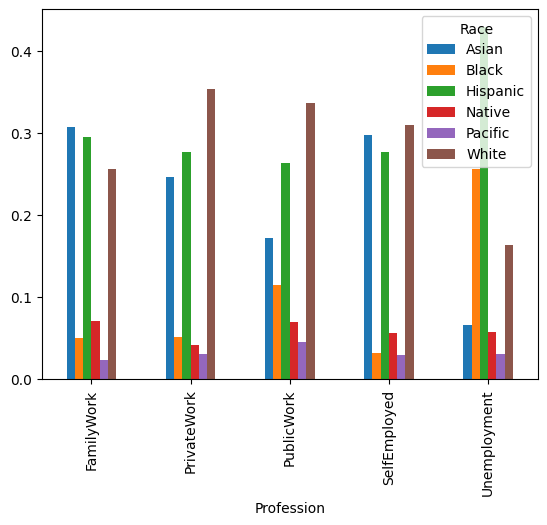

In [17]:
cross = pd.crosstab(df['Profession'],df['Race'],normalize='index')
print(cross)
cross.plot(kind='bar')

#### ... or better:

<Axes: xlabel='Profession'>

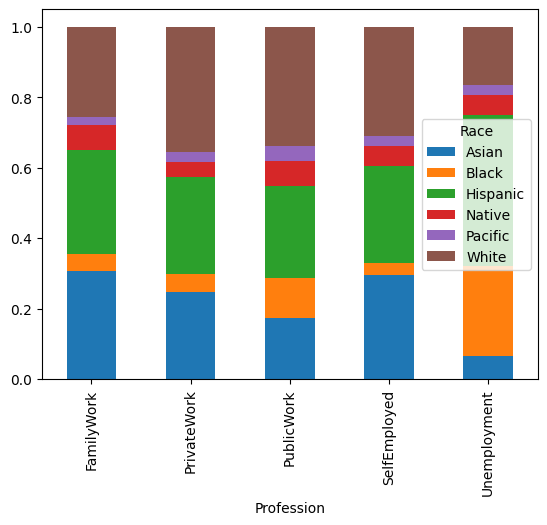

In [19]:
cross.plot(kind='bar', stacked=True)

## Activity: Selection Bias

**Problem**  

Your goal is to demonstrate how analyzing a biased subset of data can lead to different, potentially misleading, insights compared to analyzing the complete, representative dataset. Go to Kaggle and select a publicly available dataset and load your chosen dataset into your analytical environment. With that, choose one or two specific aspects or relationships e that you find interesting to analyze. Then:

- Select the first 10% of the records as your "biased sample": Formulate a preliminary conclusion or hypothesis based only on this first 10% of the data.

- Comprehensive Analysis (Full Dataset): Now, perform the exact same analysis (i.e., focusing on the same aspects or relationships) using the entire dataset.

**Comparison of Conclusions**

Carefully compare the conclusions, patterns, and insights you drew from the initial 10% biased sample with those derived from the full dataset. Do your preliminary conclusions from the biased sample still hold true, or are they contradicted by the full dataset analysis? Relate your observations back to the definition of selection bias provided: "Occurs when the data sample is not representative of the target population. This can happen due to non-random sampling, over- or under-representation of certain groups, or self-selection bias."
